In [1]:
# loading essential libraries first
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns

In [2]:
df = pd.read_csv("all_data_merged.csv")

In [3]:
ml_alg = df.copy()
ml_alg.head()

,Unnamed: 0,Year,State,FIPS,18_or_Older_AMI_Total,Tot_Cases,Toth_Deaths,<High School,High School,Some college or associates degree,...,Unemployed_2017,Employed_2018,Unemployed_2018,Employed_2019,Unemployed_2019,Employed_2020,Unemployed_2020,Employed_2021,Unemployed_2021,Median_Household_Income_2020
0,0,2017,Alabama,1,712000,0,0,438947,1014342,1013673,...,99585,2153080,87397,2199868,72024,2121149,147160,2169721,77272,53958
1,1,2018,Alabama,1,217000,0,0,438947,1014342,1013673,...,99585,2153080,87397,2199868,72024,2121149,147160,2169721,77272,53958
2,2,2019,Alabama,1,680000,0,0,438947,1014342,1013673,...,99585,2153080,87397,2199868,72024,2121149,147160,2169721,77272,53958
3,3,2020,Alabama,1,794000,362015,7189,438947,1014342,1013673,...,99585,2153080,87397,2199868,72024,2121149,147160,2169721,77272,53958
4,4,2021,Alabama,1,794000,904526,16747,438947,1014342,1013673,...,99585,2153080,87397,2199868,72024,2121149,147160,2169721,77272,53958


In [4]:
ml_alg.drop(['Unnamed: 0'], axis = 1, inplace = True)
ml_alg.dtypes

Year                                  int64
State                                object
FIPS                                  int64
18_or_Older_AMI_Total                 int64
Tot_Cases                             int64
Toth_Deaths                           int64
<High School                          int64
High School                           int64
Some college or associates degree     int64
Bachelors degree or higher            int64
Employed_2017                         int64
Unemployed_2017                       int64
Employed_2018                         int64
Unemployed_2018                       int64
Employed_2019                         int64
Unemployed_2019                       int64
Employed_2020                         int64
Unemployed_2020                       int64
Employed_2021                         int64
Unemployed_2021                       int64
Median_Household_Income_2020          int64
dtype: object

In [5]:
corr = ml_alg.corr()
corr

,Year,FIPS,18_or_Older_AMI_Total,Tot_Cases,Toth_Deaths,<High School,High School,Some college or associates degree,Bachelors degree or higher,Employed_2017,Unemployed_2017,Employed_2018,Unemployed_2018,Employed_2019,Unemployed_2019,Employed_2020,Unemployed_2020,Employed_2021,Unemployed_2021,Median_Household_Income_2020
Year,1.000000,0.016191,0.066445,0.525123,0.521407,0.015686,0.019130,0.014776,0.024411,0.020015,0.018212,0.019844,0.017056,0.019759,0.016787,0.019279,0.018855,0.018441,0.018347,0.015760
FIPS,0.016191,1.000000,-0.081528,-0.049541,-0.055634,-0.137106,-0.090721,-0.127301,-0.131762,-0.115458,-0.122955,-0.115622,-0.122293,-0.114701,-0.117753,-0.108705,-0.133474,-0.108330,-0.123646,-0.109105
18_or_Older_AMI_Total,0.066445,-0.081528,1.000000,0.515617,0.502740,0.752993,0.756026,0.768053,0.776856,0.776338,0.772090,0.776118,0.772482,0.775962,0.771195,0.774187,0.769556,0.772631,0.764916,0.159211
Tot_Cases,0.525123,-0.049541,0.515617,1.000000,0.984066,0.447052,0.461591,0.459944,0.456904,0.462199,0.455599,0.462334,0.454738,0.462504,0.450829,0.462906,0.448874,0.463159,0.441844,0.051810
Toth_Deaths,0.521407,-0.055634,0.502740,0.984066,1.000000,0.434305,0.465151,0.448774,0.449011,0.454987,0.449283,0.455251,0.448485,0.455674,0.442510,0.456768,0.440082,0.457296,0.432352,0.048388
<High School,0.015686,-0.137106,0.752993,0.447052,0.434305,1.000000,0.924143,0.974880,0.966813,0.975146,0.974961,0.975505,0.974441,0.975295,0.971274,0.973977,0.972489,0.974178,0.978582,0.136899
High School,0.019130,-0.090721,0.756026,0.461591,0.465151,0.924143,1.000000,0.968250,0.953301,0.971819,0.964630,0.971838,0.963891,0.972267,0.956963,0.973678,0.944015,0.974523,0.925561,0.073856
Some college or associates degree,0.014776,-0.127301,0.768053,0.459944,0.448774,0.974880,0.968250,1.000000,0.980731,0.991979,0.985854,0.992335,0.986682,0.992585,0.983223,0.992514,0.976961,0.993204,0.966944,0.134208
Bachelors degree or higher,0.024411,-0.131762,0.776856,0.456904,0.449011,0.966813,0.953301,0.980731,1.000000,0.993610,0.988359,0.993435,0.988314,0.993272,0.984306,0.990909,0.989315,0.989791,0.984138,0.258030
Employed_2017,0.020015,-0.115458,0.776338,0.462199,0.454987,0.975146,0.971819,0.991979,0.993610,1.000000,0.993155,0.999966,0.993596,0.999874,0.989680,0.999259,0.986515,0.998758,0.981092,0.191244


<AxesSubplot:>

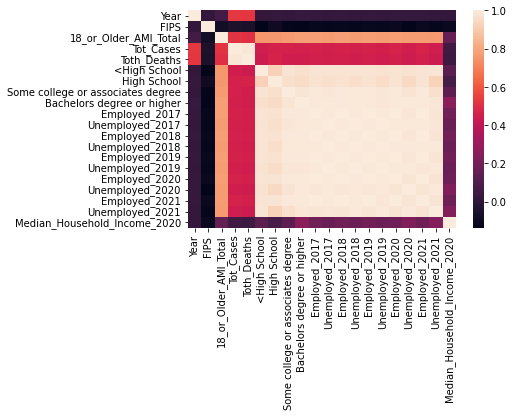

In [6]:
sns.heatmap(corr)

In [7]:
covid_ami = ml_alg[['18_or_Older_AMI_Total', 'Tot_Cases']].copy()
covid_ami.corr()

,18_or_Older_AMI_Total,Tot_Cases
18_or_Older_AMI_Total,1.000000,0.515617
Tot_Cases,0.515617,1.000000


In [8]:
# select features 
X = ml_alg.drop(['18_or_Older_AMI_Total', 'State'], axis = 1)
y = ml_alg[["18_or_Older_AMI_Total"]]

In [9]:
X.shape

(239, 19)

In [10]:
y.shape

(239, 1)

In [11]:
X_train = X[:175].values
X_test = X[175:].values
y_train = y[:175].values
y_test = y[175:].values

In [12]:
X_test

array([[   2017,      42,       0, ..., 5999442,  406743,   64898],
       [   2018,      42,       0, ..., 5999442,  406743,   64898],
       [   2019,      42,       0, ..., 5999442,  406743,   64898],
       ...,
       [   2021,      36, 1924606, ..., 8786280,  655178,   73354],
       [   2020,      51,  354767, ..., 4100803,  166853,   79154],
       [   2021,      51, 1133238, ..., 4100803,  166853,   79154]])

In [13]:
y_test

array([[1731000],
       [ 806000],
       [1861000],
       [1814000],
       [1963000],
       [ 178000],
       [ 102000],
       [ 160000],
       [ 178000],
       [ 187000],
       [ 636000],
       [1587000],
       [ 677000],
       [ 706000],
       [ 760000],
       [ 104000],
       [ 993000],
       [ 113000],
       [ 112000],
       [ 118000],
       [1005000],
       [1731000],
       [ 986000],
       [ 937000],
       [1006000],
       [3229000],
       [  94000],
       [3196000],
       [3347000],
       [3602000],
       [ 417000],
       [ 417000],
       [ 464000],
       [ 550000],
       [ 599000],
       [ 102000],
       [1005000],
       [ 104000],
       [ 104000],
       [ 112000],
       [1049000],
       [ 692000],
       [1139000],
       [1269000],
       [1360000],
       [ 305000],
       [1049000],
       [ 300000],
       [ 337000],
       [ 347000],
       [ 807000],
       [ 251000],
       [ 817000],
       [ 859000],
       [ 904000],
       [  

In [14]:
# create a Linear Regression model object
regression_model_df2 = LinearRegression()

In [15]:
X_test

array([[   2017,      42,       0, ..., 5999442,  406743,   64898],
       [   2018,      42,       0, ..., 5999442,  406743,   64898],
       [   2019,      42,       0, ..., 5999442,  406743,   64898],
       ...,
       [   2021,      36, 1924606, ..., 8786280,  655178,   73354],
       [   2020,      51,  354767, ..., 4100803,  166853,   79154],
       [   2021,      51, 1133238, ..., 4100803,  166853,   79154]])

In [16]:
# pass through the X_train & y_train data set
regression_model_df2.fit(X_train, y_train)

LinearRegression()

In [17]:
# Grab the coefficient of our model and the intercept
intercept = regression_model_df2.intercept_[0]
coefficent = regression_model_df2.coef_[0][0]
intercept
coefficent

-56322.266108066775

In [18]:
# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model_df2.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The Coefficient for Year is -5.6e+04
The Coefficient for FIPS is 7.9e+03
The Coefficient for Tot_Cases is 0.57
The Coefficient for Toth_Deaths is -1.3e+01
The Coefficient for <High School is 0.34
The Coefficient for High School is 0.88
The Coefficient for Some college or associates degree is 0.24
The Coefficient for Bachelors degree or higher is 0.047
The Coefficient for Employed_2017 is -7.0
The Coefficient for Unemployed_2017 is -1.7
The Coefficient for Employed_2018 is 1.1e+01
The Coefficient for Unemployed_2018 is 6.2
The Coefficient for Employed_2019 is -5.3
The Coefficient for Unemployed_2019 is -4.9
The Coefficient for Employed_2020 is 4.5
The Coefficient for Unemployed_2020 is -2.6
The Coefficient for Employed_2021 is -3.0
The Coefficient for Unemployed_2021 is 5.3
The Coefficient for Median_Household_Income_2020 is 1.2e+01


In [19]:
# Get multiple predictions
y_predict = regression_model_df2.predict(X_test)

# Show the first 5 predictions
y_predict[:5]

array([[2456765.37068345],
       [2400443.10457538],
       [2344120.83846731],
       [2444477.44702724],
       [2903895.14477238]])

In [20]:
regression_model_df2.score(X_train, y_train)

0.634705411695468

In [21]:

r2_score_df2 = r2_score(y_test, y_predict)
r2_score_df2

0.34165087155581164

## Multiple Linear Regression

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)

In [23]:
model = LinearRegression()

In [24]:
# Fit the model to the training data, and calculate the scores for the training and testing data.
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7004274992561863
Testing Score: 0.384715433254897


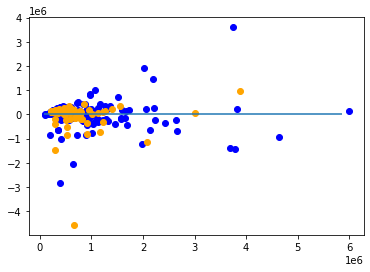

In [25]:
# Plot the residuals for the training and testing data.
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c = "b")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c = "orange")
plt.hlines(y = 0, xmin = y.min(), xmax = y.max())